Object Detection using **Haar feature-based cascade classifiers** is an effective [object detection method proposed by Paul Viola](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) and Michael Jones in their paper and improved later by Rainer Lienhart.

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

cv2.CascadeClassifierload method - 
1. https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html

References - 
1. https://github.com/opencv/opencv/tree/3.4/data
2. https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing/images_data

[Errno 2] No such file or directory: '../gdrive/My Drive/Colab Notebooks/_Image Processing/images_data'
/gdrive/My Drive/Colab Notebooks/_Image Processing


In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

In [ ]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

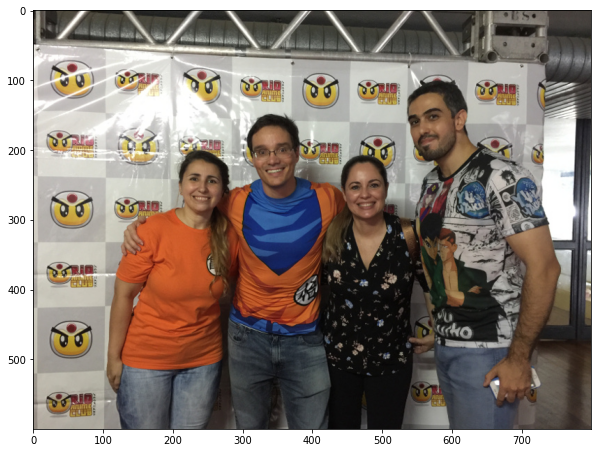

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')

grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

### Face Detection 

detectMultiScale function
- Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.
- detectMultiScale function is used to detect the faces. This function will return a rectangle with coordinates(x,y,w,h) around the detected face. It takes 3 common arguments — the input image, scaleFactor, and minNeighbours. scaleFactor specifies how much the image size is reduced with each scale



In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
test_image.shape

(600, 800, 3)

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade

<CascadeClassifier 0x7f3eaf7000f0>

In [ ]:
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
faces

array([[525, 122,  84,  84],
       [302, 169,  82,  82],
       [207, 215,  71,  71],
       [440, 225,  70,  70]], dtype=int32)

In [ ]:
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2) # BGR rectangle

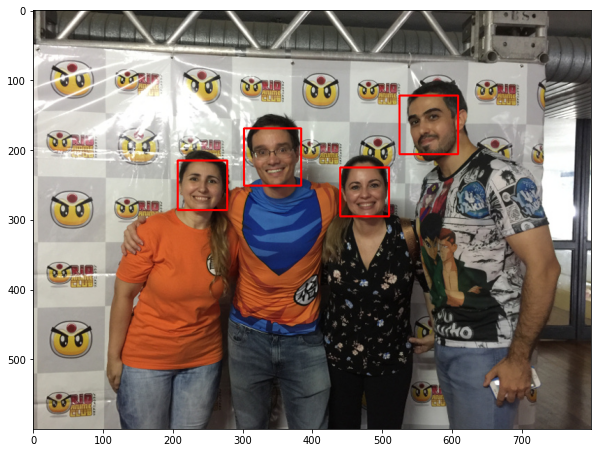

In [ ]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Smile Detection
Using pre-trained model haarcascade_smile.xml to detect smiles on the pictures.

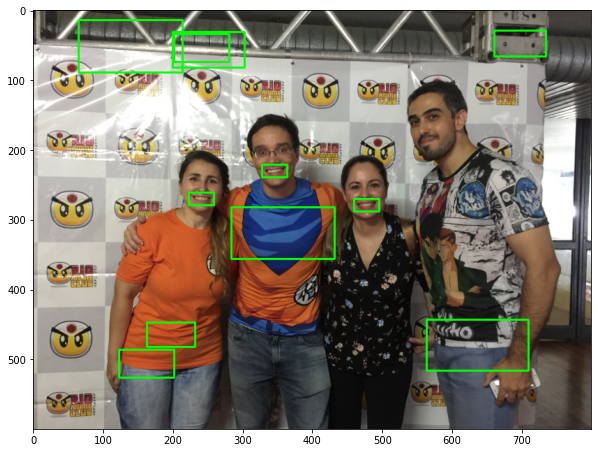

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

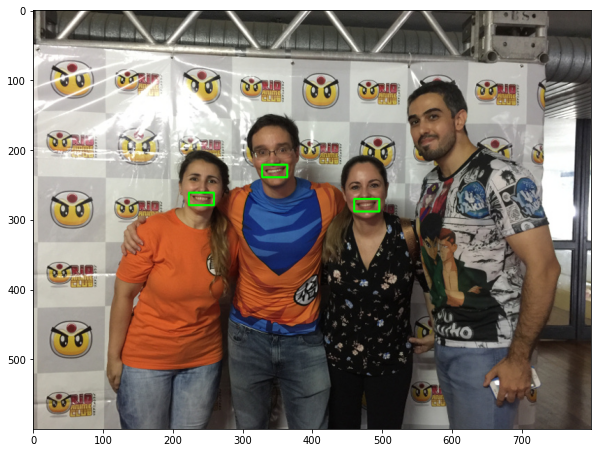

In [ ]:
# consider detected smiles inside previously detected faces.

# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Eye Detection
Using the pre-trained model haarcascade_frontalface_default.xml to detect faces on the pictures.

In [ ]:
test_image = cv2.imread('test.jpg')

In [ ]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eye_cascade

<CascadeClassifier 0x7f3ead5f8c10>

In [ ]:
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
eyes

array([[294,  99,  27,  27],
       [207,  78,  53,  53],
       [110,  58,  81,  81],
       [458,  80,  74,  74],
       [562, 142,  23,  23],
       [539, 151,  20,  20],
       [344, 185,  30,  30],
       [220, 232,  21,  21],
       [246, 236,  20,  20],
       [481, 241,  20,  20],
       [451, 244,  20,  20],
       [243, 230,  26,  26],
       [552, 448,  23,  23],
       [538, 521,  57,  57]], dtype=int32)

In [ ]:
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)

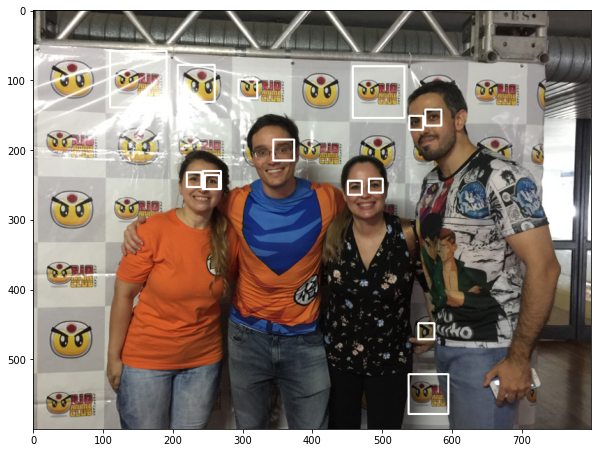

In [ ]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Similar to what happened to the smiles, there is a few of false positives, and in this particular case a false negative (probably the glass confused the classifier). 

So we will use the same approach to filter recognized eyes that are inside faces.

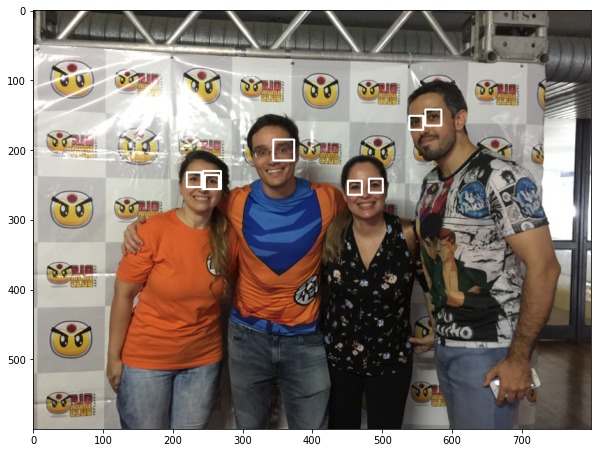

In [ ]:
test_image = cv2.imread('test.jpg')

for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Putting all together 

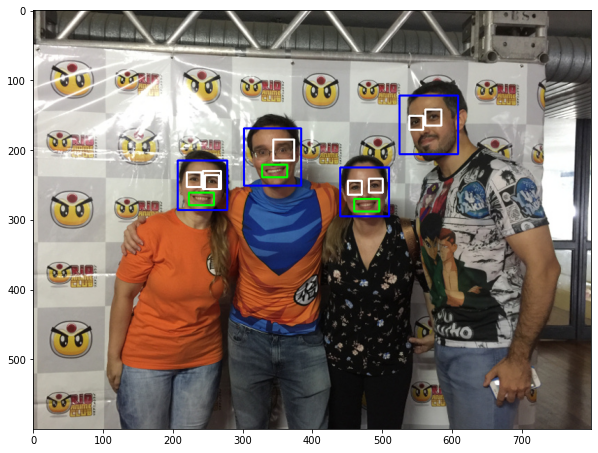

In [ ]:
test_image = cv2.imread('test.jpg')

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2) # blue color boxes
  
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))